# Economotrics Project (BGD708)

#### Author: 
Alban Pereira (alban.pereira@telecom-paris.fr)

Laurent Gayraud (laurent.gayraud@telecom-paris.fr)

## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/laurentgayraud/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## <span style="color:red"> PARTIE 1 - CROSS-SECTION DATA</span>
Cette partie utilise le jeu de données HPRICE2.RAW décrit dans HPRICE2.DES.

#### <span style="color:green"> Introduction, imports.</span>

In [4]:
# Importation des données
df = pd.read_csv('data/HPRICE2.raw', delim_whitespace=True, header=None)

# Insertion des noms de colonnes
columns = [
    "price", "crime", "nox", "rooms", "dist", "radial", "proptax", "stratio",
    "lowstat", "lprice", "lnox", "lproptax"
]
df.columns = columns

df.head()

/var/folders/rq/863l2c_x3w118szjr021z_ym0000gn/T/ipykernel_36006/163014172.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/HPRICE2.raw', delim_whitespace=True, header=None)


,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


Le fichier HPRICE2.DES décrit un ensemble de données contenant 506 observations avec les variables suivantes :
1. price : prix médian des logements, en dollars
2. crime : crimes commis par habitant
3. nox : oxyde nitreux, parties pour 100 millions
4. rooms : nombre moyen de chambres par maison
5. dist : distance pondérée jusqu'à 5 centres d'emploi
6. radial : indice d'accessibilité aux autoroutes radiales
7. proptax : taxe foncière par 1000 dollars
8. stratio : ratio moyen élève-enseignant
9. lowstat : % de personnes de 'statut inférieur'
10. lprice : logarithme du prix
11. lnox : logarithme de nox
12. lproptax : logarithme de la taxe foncière

#### <span style="color:green"> Q1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.</span>

L'hypothèse fondamentale sous laquelle les estimateurs des moindres carrés ordinaires (OLS) sont non biaisés est que **la variable non observée a une moyenne nulle** , **la moyenne conditionnelle est égale à la moyenne inconditionnelle**, et qu'**il n'y a pas de corrélation entre les variables explicatives X et le terme d'erreur u**.  
  
Nous avons donc $E(u∣X) = E(u)= 0$.  
  
En d'autres termes, ce que l'on observe est indépendant de ce que l'on n'observe pas.

#### <span style="color:green"> Q2. Show that under this assumption the OLS estimators are indeed unbiased.</span>

Sous l'hypothèse que $E(u|X) = 0$, où $u$ est le terme d'erreur et $X$ représente les variables indépendantes, les estimateurs des moindres carrés ordinaires (OLS) $\hat{\beta}$ sont non biaisés. Cela est montré comme suit :

Étant donné un modèle linéaire $Y = X\beta + u$,

1. L'estimateur OLS $\hat{\beta}$ est donné par $\hat{\beta} = (X'X)^{-1}X'Y$  
Sous réserve que le produit $(X'X)$ soit inversible ce qui ce traduit par une absence de colinéarité parfaite entre X' et X ce qui est une hypothèse de notre modèle.   
L'inversibilité implique également que le nombre d'observations doit être suffisant pour fournir une variation suffisante dans les données, ce qui aide à éviter une situation où X pourrait être singulière. Etant donnée la forme des données (12 colonnes pour plus de 500 lignes), cette hypothèse est aussi vérifiée.
  
2. En substituant $Y = X\beta + u$ dans l'équation de l'estimateur, on obtient $\hat{\beta} = (X'X)^{-1}X'(X\beta + u)$.
3. En simplifiant $( (X'X)^{-1}(X'X) = I )$, on obtient : $\hat{\beta} = \beta + (X'X)^{-1}X'u$.

En prenant l'espérance :

4. $E(\hat{\beta}) = E(\beta + (X'X)^{-1}X'u) = \beta + (X'X)^{-1}X'E(u)$.

D'après l'hypothèse fondamentale $E(u|X) = E(u) = 0$, donc :

5. $E(\hat{\beta}) = \beta$.

Par conséquent, sous l'hypothèse fondamentale, les estimateurs OLS $\hat{\beta}$ sont non biaisés, ce qui signifie que $E(\hat{\beta}) = \beta$.


#### <span style="color:green"> Q3. Explain the sample selection bias with an example from the course.</span>

Le biais de sélection d'échantillon se produit lorsque **l'échantillon ne représente pas précisément la population, conduisant à des estimations biaisées**.

Un exemple tiré du cours est l'étude de l'effet de l'engrais sur le rendement des cultures. Si davantage d'engrais est systématiquement appliqué à des terres intrinsèquement plus fertiles, l'analyse peut attribuer à tort le rendement supérieur à l'engrais, en négligeant la fertilité intrinsèque de la terre. Cela se produit parce que la sélection des parcelles pour la fertilisation est influencée par un facteur non observé (la fertilité de la terre) qui affecte également le résultat (le rendement), provoquant une surestimation de l'effet de l'engrais.  
  
Corriger ce biais nécessite des techniques pour tenir compte de telles variables non observées.

#### <span style="color:green"> Q4. Explain the omitted variable bias with an example from the course.</span>

Le biais de variable omise se produit lorsqu'**une variable pertinente est exclue d'un modèle, causant des estimations biaisées des effets d'autres variables**.
  
Un exemple du cours relatif à l'effet de l'éducation sur les salaires pourrait bien illustrer ce concept. Si nous examinons comment l'éducation affecte les salaires sans tenir compte de l'expérience professionnelle, nous pourrions surestimer l'impact de l'éducation. Cela est dû au fait que l'éducation et l'expérience professionnelle influencent toutes deux les salaires, mais omettre l'expérience professionnelle signifie qu'une partie de l'effet observé de l'éducation sur les salaires peut en réalité être due à l'expérience professionnelle, qui est corrélée avec l'éducation.

#### <span style="color:green"> Q5. Explain the problem of multicollinearity. Is it a problem in this dataset?</span>

La multicollinéarité dans un modèle de régression survient lorsque plusieurs variables explicatives sont linéairement dépendantes, ou presque. Cette interdépendance peut entraîner une matrice  singulière ou presque singulière, dont le déterminant est proche de zéro. L'inversibilité de $(X'X)$ est cruciale car l'estimateur des moindres carrés est défini en dépend. Sans inverse, nous ne pouvons pas calculer cet estimateur.

Pour pallier la multicollinéarité, on peut augmenter le nombre d'observations pour renforcer la robustesse de la matrice ou diminuer le nombre de variables explicatives en les retirant.

In [8]:
# Calcul de la matrice de corrélation
correlation_matrix = df.drop(['price', 'lprice'], axis=1).corr()
correlation_matrix

,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lnox,lproptax
crime,1.000000,0.421152,-0.218816,-0.379909,0.625442,0.582819,0.288691,0.447033,0.429639,0.551393
nox,0.421152,1.000000,-0.302828,-0.770222,0.610328,0.666981,0.186863,0.585613,0.993943,0.659206
rooms,-0.218816,-0.302828,1.000000,0.205410,-0.209773,-0.292120,-0.354008,-0.609605,-0.304988,-0.299269
dist,-0.379909,-0.770222,0.205410,1.000000,-0.495065,-0.534379,-0.229269,-0.495602,-0.808795,-0.513897
radial,0.625442,0.610328,-0.209773,-0.495065,1.000000,0.910228,0.464244,0.476038,0.624171,0.863531
proptax,0.582819,0.666981,-0.292120,-0.534379,0.910228,1.000000,0.454238,0.527624,0.677314,0.988586
stratio,0.288691,0.186863,-0.354008,-0.229269,0.464244,0.454238,1.000000,0.365402,0.227910,0.422231
lowstat,0.447033,0.585613,-0.609605,-0.495602,0.476038,0.527624,0.365402,1.000000,0.596220,0.510948
lnox,0.429639,0.993943,-0.304988,-0.808795,0.624171,0.677314,0.227910,0.596220,1.000000,0.667252
lproptax,0.551393,0.659206,-0.299269,-0.513897,0.863531,0.988586,0.422231,0.510948,0.667252,1.000000


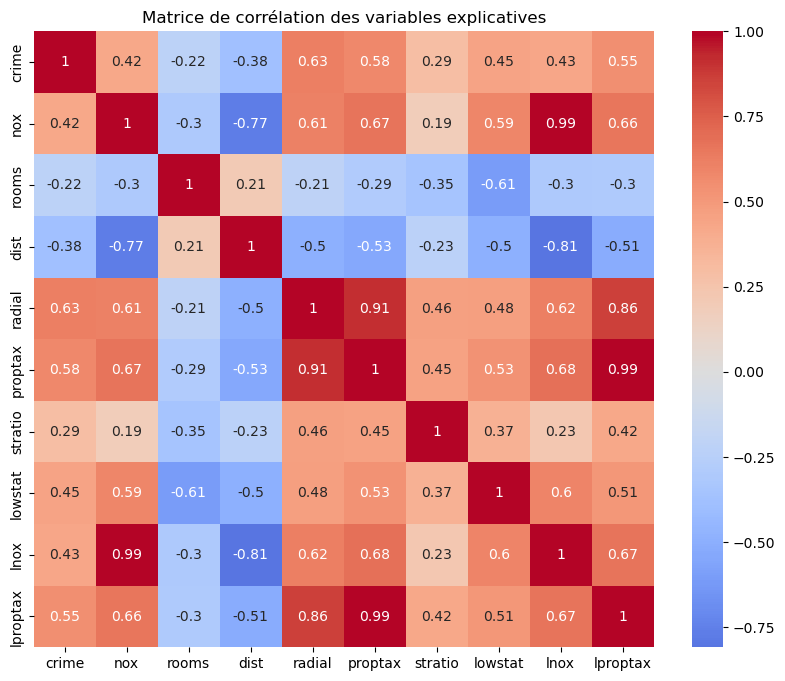

In [9]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables explicatives')
plt.show()

La matrice de corrélation et la carte thermique révèlent plusieurs paires de variables explicatives avec des coefficients de corrélation élevés, indiquant des problèmes potentiels de multicollinéarité dans l'ensemble de données. Par exemple :

- _nox_ et _lnox_ présentent une corrélation très élevée proche de 1, ce qui est attendu puisque _lnox_ est le logarithme de _nox_.
- _proptax_ et _lproptax_ affichent également une corrélation très élevée pour la même raison.
- _radial_ et _proptax_ ont un coefficient de corrélation de 0,91, suggérant une forte relation linéaire.
- _dist_ et _nox_ ont une corrélation négative de -0,77, indiquant qu'à mesure que la distance par rapport aux centres d'emploi augmente, la concentration d'oxydes d'azote diminue.
  
En résumé, nous sommes ici bien affectés par le problème de colinéarité.

#### Q6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%

In [14]:
# Calculate the percentiles for the 'nox' variable
nox_sorted = df['nox'].sort_values()
n = len(nox_sorted)
index_25th = int(n * 0.25)
index_75th = int(n * 0.75)

# Get the values at the 25th and 75th percentiles
value_25th = nox_sorted.iloc[index_25th]
value_75th = nox_sorted.iloc[index_75th]

# Create categories based on these percentiles
df['nox_category'] = pd.cut(df['nox'], bins=[nox_sorted.min(), value_25th, value_75th, nox_sorted.max()], labels=['low', 'medium', 'high'], include_lowest=True)

# Display the distribution of the new categories
df['nox_level'].value_counts()

nox_level
Medium    254
Low       128
High      124
Name: count, dtype: int64

#### Q7. Compute for each category of <i>nox</i> level the average median price and comment on your results.

In [16]:
# Compute for each category of nox level the average median price and comment on your results
df.groupby('nox_category')['price'].median()

nox_category
low       24349.0
medium    21150.0
high      14250.0
Name: price, dtype: float64

<b>Commentary :</b>

These results indicate a clear negative relationship between the levels of nitrous oxide (<i>nox</i>) and the average median <i>price</i> of housing. As the <i>nox</i> level increases from low to high, the average median price decreases significantly. This suggests that higher levels of pollution (as indicated by higher <i>nox</i> levels) are associated with lower housing <i>prices</i>, which could be due to lower desirability of living in more polluted areas.

#### Q8. Produce a scatter plot with the variable <i>price</i> on the y-axis and the variable <i>nox</i> on the x-axis. Is this a ceteris paribus effect?

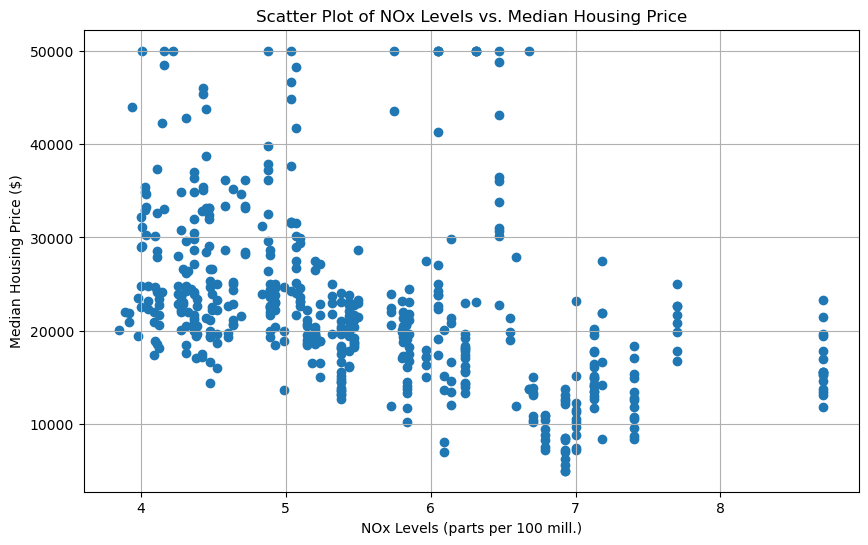

In [19]:
# Plotting the scatter plot of 'nox' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['nox'], df['price'])
plt.title('Scatter Plot of NOx Levels vs. Median Housing Price')
plt.xlabel('NOx Levels (parts per 100 mill.)')
plt.ylabel('Median Housing Price ($)')
plt.grid(True)
plt.show()

<b> Commentary : </b>

The scatter plot of NOx levels versus median housing prices shows a general trend where housing prices tend to decrease as NOx levels increase. This visual trend supports the idea that areas with higher pollution levels (as measured by NOx) tend to have lower housing prices.

No, this scatter plot does not represent a ceteris paribus effect.

In a ceteris paribus analysis, we examine the effect of changing one variable while keeping all other variables constant. However, in a scatter plot like the one created here, each data point represents a unique observation where multiple variables, including <i>nox</i> and <i>price</i>, can vary simultaneously.

Therefore, without controlling for other variables, we cannot isolate the effect of <i>nox</i> on <i>price</i> while holding all other variables constant.

To perform a ceteris paribus analysis, we would typically use techniques like regression analysis, where we can control for the effects of other variables while examining the relationship between <i>nox</i> and <i>price</i>.

#### Q9. Run a regression of <i>price</i> on a <i>constant</i>, <i>crime</i>, <i>nox</i>, <i>rooms</i>, <i>proptax</i>. Comment on the histogram of the residuals. Interpret all coefficients.

#### Q10. Run a regression of <i>lprice</i> on a <i>constant</i>, <i>crime</i>, <i>nox</i>, <i>rooms</i>, <i>proptax</i>. Interpret all coefficients.

#### Q11. Run a regression of <i>lprice</i> on a <i>constant</i>, <i>crime</i>, <i>lnox</i>, <i>rooms</i>, <i>lproptax</i>. Interpret all coefficients.

#### Q12. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ > 0 at the 1% level.

#### Q13. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ ≠ 0 at the 1% level using the p-value of the test.

#### Q14. In the specification of question 9, test the hypothesis H0: $\beta_{crime}$ = $\beta_{proptax}$ at the 10% level.

#### Q15. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0, $\beta_{proptax}$ = 0 at the 10% level.

#### Q16. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = -500, $\beta_{proptax}$ = -100 at the 10% level using the p-value of the test.

#### Q17. In the specification of question 9, test the hypothesis that all coefficients are the same for observations with low levels of <i>nox</i> vs. medium and high levels of <i>nox</i>. 

#### Q18. Repeat the test of question 17 but now assuming that only the coefficients of <i>nox</i> and <i>proptax</i> can change between the two groups of observations. State and test $H_{0}$.

## PART 2 - HETEROSKEDASTICITY

#### Q19. Explain the problem of heteroskedasticity with an example of the course. 

#### Q20. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^{2}$ on constant, crime, nox, rooms, proptax, test $H_{0}$: $\delta_{crime}$, $\delta_{nox}$, $\delta_{room}$, $\delta_{proptax}$ = 0, where the coefficients $\delta_{k}$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.

#### Q21. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form.

#### Q22. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form.

#### Q23. Comment on the differences between your results of questions 20,21,22.

#### Q24. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight. 

## PART 3 - TIME SERIES DATA

This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.

#### Q25. Define strict and weak stationarity.

#### Q26. Explain ergodicity and state the ergodic theorem. Illustrate with an example.

#### Q27. Why do we need both stationarity and ergodicity? 

#### Q28. Explain “spurious regression”.

#### Q29. Make all time series stationary by computing the difference between the original variable and a moving average of order 10. 

#### Q30. Using the original dataset, test the unit root hypothesis for all variables.

#### Q31. Transform all variables so that they are stationary using either your answers to questions 29 or to question 30.

#### Q32. Explain the difference between ACF and PACF. 

#### Q33. Plot and comment on the ACF and PACF of all variables. 

#### Q34. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

#### Q35. Explain the problem of auto-correlation of the errors.

#### Q36. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.

#### Q37. Regardless of your answer to question 36, correct auto-correlation with GLS. Comment on your results.

#### Q38. For all variables, construct their lag 1 and lag 2 variables.

#### Q39. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?

#### Q40. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.

#### Q41. Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.

#### Q42. Test the structural breakpoint using a trim ratio of 30% at the 1% level.